## ကတ်ပိုးလ် စကိတ်စီးခြင်း

> **ပြဿနာ**: ပီတာသည် ဝံကို လွတ်မြောက်ရန်အတွက် သူထက် ပိုမြန်စွာ ရွေ့လျားနိုင်ရမည်။ ပီတာသည် စကိတ်စီးခြင်းကို သင်ယူနိုင်ပုံ၊ အထူးသဖြင့် တိုင်းတန်းမှုကို ထိန်းသိမ်းနိုင်ပုံကို Q-Learning အသုံးပြု၍ ကြည့်ရှုမည်။

ပထမဦးစွာ gym ကို ထည့်သွင်းပြီး လိုအပ်သော စာကြည့်တိုက်များကို သွင်းယူပါ:


In [1]:
import sys
!pip install gym 

import gym
import matplotlib.pyplot as plt
import numpy as np
import random

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


## ကားတပေါ်ပေါင်းပတ်ဝန်းကျင်တစ်ခု ဖန်တီးပါ


In [2]:
env = gym.make("CartPole-v1")
print(env.action_space)
print(env.observation_space)
print(env.action_space.sample())

Discrete(2)
Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
0


ပတ်ဝန်းကျင်အလုပ်လုပ်ပုံကိုကြည့်ရှုရန်၊ အဆင့် ၁၀၀ အတွက်တိုတောင်းသောသရုပ်ပြမှုတစ်ခုကို လုပ်ဆောင်ကြပါစို့။


In [3]:
env.reset()

for i in range(100):
   env.render()
   env.step(env.action_space.sample())
env.close()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


ဆန်းစစ်မှုအတွင်းတွင် ကျွန်ုပ်တို့သည် လုပ်ဆောင်ရန် ဆုံးဖြတ်နိုင်ရန်အတွက် ကြည့်ရှုမှုများကို ရယူရန် လိုအပ်ပါသည်။ အမှန်အားဖြင့် `step` အလုပ်ဆောင်မှုသည် လက်ရှိကြည့်ရှုမှုများ၊ reward function နှင့် ဆန်းစစ်မှုကို ဆက်လက်လုပ်ဆောင်ရန် အဓိပ္ပါယ်ရှိမရှိကို ပြသသော `done` အလံကို ပြန်ပေးသည်။


In [4]:
env.reset()

done = False
while not done:
   env.render()
   obs, rew, done, info = env.step(env.action_space.sample())
   print(f"{obs} -> {rew}")
env.close()

[ 0.03044442 -0.19543914 -0.04496216  0.28125618] -> 1.0
[ 0.02653564 -0.38989186 -0.03933704  0.55942606] -> 1.0
[ 0.0187378  -0.19424049 -0.02814852  0.25461393] -> 1.0
[ 0.01485299 -0.38894946 -0.02305624  0.53828712] -> 1.0
[ 0.007074   -0.19351108 -0.0122905   0.23842953] -> 1.0
[ 0.00320378  0.00178427 -0.00752191 -0.05810469] -> 1.0
[ 0.00323946  0.19701326 -0.008684   -0.35315131] -> 1.0
[ 0.00717973  0.00201587 -0.01574703 -0.06321931] -> 1.0
[ 0.00722005  0.19736001 -0.01701141 -0.36082863] -> 1.0
[ 0.01116725  0.39271958 -0.02422798 -0.65882671] -> 1.0
[ 0.01902164  0.19794307 -0.03740452 -0.37387001] -> 1.0
[ 0.0229805   0.39357584 -0.04488192 -0.67810827] -> 1.0
[ 0.03085202  0.58929164 -0.05844408 -0.98457719] -> 1.0
[ 0.04263785  0.78514572 -0.07813563 -1.2950295 ] -> 1.0
[ 0.05834076  0.98116859 -0.10403622 -1.61111521] -> 1.0
[ 0.07796413  0.78741784 -0.13625852 -1.35259196] -> 1.0
[ 0.09371249  0.98396202 -0.16331036 -1.68461179] -> 1.0
[ 0.11339173  0.79106371 -0.197

ကျွန်ုပ်တို့ အဲဒီနံပါတ်တွေ၏ အနည်းဆုံးနှင့် အများဆုံးတန်ဖိုးကို ရနိုင်ပါတယ်။


In [5]:
print(env.observation_space.low)
print(env.observation_space.high)

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
def discretize(x):
    return tuple((x/np.array([0.25, 0.25, 0.01, 0.1])).astype(np.int))

အခြားသော discretization နည်းလမ်းများကို bins အသုံးပြု၍လည်း စူးစမ်းကြည့်ပါ။


In [7]:
def create_bins(i,num):
    return np.arange(num+1)*(i[1]-i[0])/num+i[0]

print("Sample bins for interval (-5,5) with 10 bins\n",create_bins((-5,5),10))

ints = [(-5,5),(-2,2),(-0.5,0.5),(-2,2)] # intervals of values for each parameter
nbins = [20,20,10,10] # number of bins for each parameter
bins = [create_bins(ints[i],nbins[i]) for i in range(4)]

def discretize_bins(x):
    return tuple(np.digitize(x[i],bins[i]) for i in range(4))

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


အခုတော့ အတိုချုံးဆင်ဆာလုပ်ဆောင်ပြီး အဲဒီကွဲပြားသောပတ်ဝန်းကျင်တန်ဖိုးများကို စောင့်ကြည့်ကြပါစို့။


In [8]:
env.reset()

done = False
while not done:
   #env.render()
   obs, rew, done, info = env.step(env.action_space.sample())
   #print(discretize_bins(obs))
   print(discretize(obs))
env.close()

(0, 0, -1, -3)
(0, 0, -2, 0)
(0, 0, -2, -3)
(0, 1, -3, -6)
(0, 2, -4, -9)
(0, 3, -6, -12)
(0, 2, -8, -9)
(0, 3, -10, -13)
(0, 4, -13, -16)
(0, 4, -16, -19)
(0, 4, -20, -17)
(0, 4, -24, -20)


In [9]:
Q = {}
actions = (0,1)

def qvalues(state):
    return [Q.get((state,a),0) for a in actions]

In [10]:
# hyperparameters
alpha = 0.3
gamma = 0.9
epsilon = 0.90

In [11]:
def probs(v,eps=1e-4):
    v = v-v.min()+eps
    v = v/v.sum()
    return v

Qmax = 0
cum_rewards = []
rewards = []
for epoch in range(100000):
    obs = env.reset()
    done = False
    cum_reward=0
    # == do the simulation ==
    while not done:
        s = discretize(obs)
        if random.random()<epsilon:
            # exploitation - chose the action according to Q-Table probabilities
            v = probs(np.array(qvalues(s)))
            a = random.choices(actions,weights=v)[0]
        else:
            # exploration - randomly chose the action
            a = np.random.randint(env.action_space.n)

        obs, rew, done, info = env.step(a)
        cum_reward+=rew
        ns = discretize(obs)
        Q[(s,a)] = (1 - alpha) * Q.get((s,a),0) + alpha * (rew + gamma * max(qvalues(ns)))
    cum_rewards.append(cum_reward)
    rewards.append(cum_reward)
    # == Periodically print results and calculate average reward ==
    if epoch%5000==0:
        print(f"{epoch}: {np.average(cum_rewards)}, alpha={alpha}, epsilon={epsilon}")
        if np.average(cum_rewards) > Qmax:
            Qmax = np.average(cum_rewards)
            Qbest = Q
        cum_rewards=[]

0: 108.0, alpha=0.3, epsilon=0.9


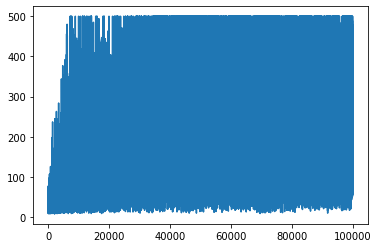

In [20]:
plt.plot(rewards)

ဒီဂရပ်ထဲကနေ ဘာမှမပြောနိုင်ပါဘူး၊ အကြောင်းကတော့ stochastic training လုပ်ငန်းစဉ်ရဲ့ သဘောသဘာဝကြောင့် training session တွေရဲ့ အချိန်အတိုင်းအတာက အလွန်အမင်းကွဲပြားနေပါတယ်။ ဒီဂရပ်ကို ပိုပြီးနားလည်နိုင်ဖို့အတွက် စမ်းသပ်မှုများစွာအပေါ် **running average** ကိုတွက်ချက်နိုင်ပါတယ်၊ ဥပမာ 100 လို့ဆိုပါစို့။ ဒါကို `np.convolve` ကိုသုံးပြီး အဆင်ပြေပြေလုပ်ဆောင်နိုင်ပါတယ်:


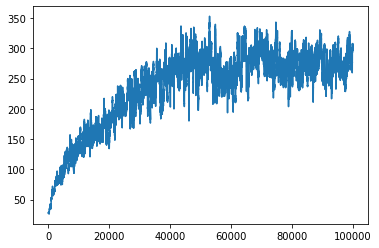

In [22]:
def running_average(x,window):
    return np.convolve(x,np.ones(window)/window,mode='valid')

plt.plot(running_average(rewards,100))

## အချက်အလက်များကို အပြောင်းအလဲလုပ်ခြင်းနှင့် ရလဒ်ကို လက်တွေ့ကြည့်ရှုခြင်း

ယခုအခါမှာ သင်ကြားပြီးသော မော်ဒယ်က ဘယ်လိုအလုပ်လုပ်သလဲဆိုတာကို တကယ်ကြည့်ရှုရင် စိတ်ဝင်စားဖွယ်ဖြစ်လိမ့်မယ်။ အဲဒီအတွက် simulation ကို run လုပ်ကြည့်ရအောင်၊ သင်ကြားမှုအတွင်း အသုံးပြုခဲ့တဲ့ အရေးယူမှု ရွေးချယ်မှု မူဝါဒတစ်ခုကို ဆက်လက်လိုက်နာမယ်။ Q-Table ထဲက probability distribution အတိုင်း sampling လုပ်ခြင်းဖြင့်:


In [23]:
obs = env.reset()
done = False
while not done:
   s = discretize(obs)
   env.render()
   v = probs(np.array(qvalues(s)))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
env.close()

## ရလဒ်ကို အနုစိတ်ရုပ်ရှင် GIF အဖြစ် သိမ်းဆည်းခြင်း

မိတ်ဆွေများကို အံ့အားသင့်စေချင်လျှင်, အချိန်ညှိတံ၏ အနုစိတ်ရုပ်ရှင် GIF ပုံကို ပို့လိုက်နိုင်ပါတယ်။ ဒါကိုလုပ်ရန်, `env.render` ကို ခေါ်သုံးပြီး ပုံရိပ်ဖရိမ်ကို ထုတ်လုပ်ပြီး, ထို့နောက် PIL library ကို အသုံးပြု၍ အနုစိတ်ရုပ်ရှင် GIF အဖြစ် သိမ်းဆည်းနိုင်ပါတယ်။


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**ဝက်ဘ်ဆိုက်မှတ်ချက်**:  
ဤစာရွက်စာတမ်းကို AI ဘာသာပြန်ဝန်ဆောင်မှု [Co-op Translator](https://github.com/Azure/co-op-translator) ကို အသုံးပြု၍ ဘာသာပြန်ထားပါသည်။ ကျွန်ုပ်တို့သည် တိကျမှန်ကန်မှုအတွက် ကြိုးစားနေသော်လည်း၊ အလိုအလျောက်ဘာသာပြန်မှုများတွင် အမှားများ သို့မဟုတ် မတိကျမှုများ ပါဝင်နိုင်သည်ကို ကျေးဇူးပြု၍ သတိပြုပါ။ မူရင်းဘာသာစကားဖြင့် ရေးသားထားသော စာရွက်စာတမ်းကို အာဏာတည်သော ရင်းမြစ်အဖြစ် သတ်မှတ်သင့်ပါသည်။ အရေးကြီးသော အချက်အလက်များအတွက် လူက ဘာသာပြန်ဝန်ဆောင်မှုကို အသုံးပြုရန် အကြံပြုပါသည်။ ဤဘာသာပြန်မှုကို အသုံးပြုခြင်းမှ ဖြစ်ပေါ်လာသော နားလည်မှုမှားများ သို့မဟုတ် အဓိပ္ပာယ်မှားများအတွက် ကျွန်ုပ်တို့သည် တာဝန်မယူပါ။
